In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\digorker\anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [246]:
df = pd.read_csv("data/Rainbow.csv")

In [247]:
#showing the data
df.head(5)

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,...,Vertical,None,Compensator,5.7_USG,Pistols,None,None,None,None,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,...,None,None,None,MK1_9mm,Pistols,None,None,None,None,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,None,None,MuzzleBrake,PRB92,Pistols,None,None,None,None,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD


In [248]:
df.shape

(4000000, 31)

In [249]:
#deleting unnecessary colums
del df['dateid']
del df['matchid']
del df['roundnumber']

In [251]:
#checking for null value
df.isnull().sum()

platform                0
gamemode                0
mapname                 0
objectivelocation       0
winrole                 0
endroundreason          0
roundduration           0
clearancelevel          0
skillrank               0
role                    0
team                    0
haswon                  0
operator                0
nbkills                 0
isdead                  0
primaryweapon           0
primaryweapontype       0
primarysight            0
primarygrip             0
primaryunderbarrel      0
primarybarrel           0
secondaryweapon         0
secondaryweapontype     0
secondarysight          0
secondarygrip           0
secondaryunderbarrel    0
secondarybarrel         0
secondarygadget         0
dtype: int64

In [252]:
df.groupby('operator').sum()

,roundduration,clearancelevel,team,haswon,nbkills,isdead
operator,,,,,,
BOPE-CAPITAO,13074857,7027597,33664,35329,46325,50267
BOPE-CAVEIRA,30355200,15773271,87053,85190,121087,119312
G.E.O.-JACKAL,38076568,21560725,95608,105184,161620,141758
G.E.O.-MIRA,32820094,17908371,92172,89899,117652,120857
GIGN-DOC,20848817,9023540,59106,56088,69291,79606
GIGN-MONTAGNE,11795758,5802379,31341,30936,26081,44274
GIGN-RESERVE,1168948,461575,3375,3005,3202,4983
GIGN-ROOK,27005439,12388587,74917,76174,91478,98628
GIGN-TWITCH,38309689,19217580,97069,106266,150382,132417


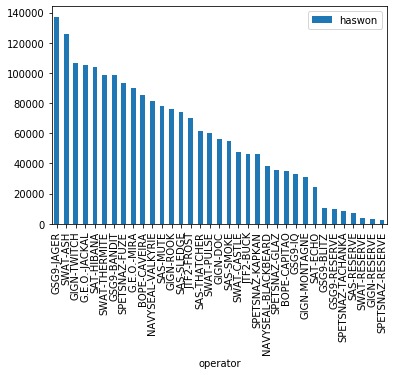

In [253]:
WinDf = df.groupby('operator').sum()
WinDf = WinDf.sort_values('haswon', ascending=False)
del WinDf['clearancelevel']
del WinDf['team']
del WinDf['roundduration']
del WinDf['nbkills']
del WinDf['isdead']
WinDf.plot.bar()

In [254]:
df.dtypes

platform                object
gamemode                object
mapname                 object
objectivelocation       object
winrole                 object
endroundreason          object
roundduration            int64
clearancelevel           int64
skillrank               object
role                    object
team                     int64
haswon                   int64
operator                object
nbkills                  int64
isdead                   int64
primaryweapon           object
primaryweapontype       object
primarysight            object
primarygrip             object
primaryunderbarrel      object
primarybarrel           object
secondaryweapon         object
secondaryweapontype     object
secondarysight          object
secondarygrip           object
secondaryunderbarrel    object
secondarybarrel         object
secondarygadget         object
dtype: object

In [255]:
WinDf.head()

,haswon
operator,
GSG9-JAGER,137264
SWAT-ASH,125753
GIGN-TWITCH,106266
G.E.O.-JACKAL,105184
SAT-HIBANA,104178


In [256]:
tempDf = df
tempDf["totalGames"] = 1
WinRate = df.groupby('operator').sum()
WinRate["Win_Rate"] = (WinRate["haswon"]) / (WinRate["totalGames"])
WinRate.head()

,roundduration,clearancelevel,team,haswon,nbkills,isdead,totalGames,Win_Rate
operator,,,,,,,,
BOPE-CAPITAO,13074857,7027597,33664,35329,46325,50267,70662,0.499972
BOPE-CAVEIRA,30355200,15773271,87053,85190,121087,119312,163613,0.520680
G.E.O.-JACKAL,38076568,21560725,95608,105184,161620,141758,204775,0.513656
G.E.O.-MIRA,32820094,17908371,92172,89899,117652,120857,175065,0.513518
GIGN-DOC,20848817,9023540,59106,56088,69291,79606,112369,0.499141


In [257]:
WinR = round((WinRate["haswon"]) / (WinRate["totalGames"]) * 100,4)
WinR = WinR.sort_values( ascending=False)
print("Win rate in %: ")
print(WinR)

Win rate in %: 
operator
JTF2-FROST             53.5207
GIGN-ROOK              53.1874
NAVYSEAL-VALKYRIE      52.0899
BOPE-CAVEIRA           52.0680
GSG9-JAGER             51.9630
GIGN-TWITCH            51.8867
GSG9-BANDIT            51.7954
SAT-HIBANA             51.4864
G.E.O.-JACKAL          51.3656
G.E.O.-MIRA            51.3518
SWAT-ASH               51.3033
SAS-MUTE               50.8680
SAS-THATCHER           50.7154
SWAT-THERMITE          50.6236
SAT-ECHO               50.5425
SAS-SLEDGE             50.4808
SAS-SMOKE              50.4201
GSG9-IQ                50.4144
SPETSNAZ-FUZE          50.1837
NAVYSEAL-BLACKBEARD    50.0390
BOPE-CAPITAO           49.9972
GIGN-DOC               49.9141
SWAT-PULSE             49.8825
JTF2-BUCK              49.8236
SPETSNAZ-KAPKAN        49.7649
SWAT-CASTLE            49.6724
SPETSNAZ-GLAZ          49.0154
GIGN-MONTAGNE          48.2531
GSG9-RESERVE           48.2143
GSG9-BLITZ             47.5300
SPETSNAZ-TACHANKA      46.3889
SWAT-RESERVE  

In [258]:
df2 = df
df2 = df2.apply(LabelEncoder().fit_transform)
df2.head()

,platform,gamemode,mapname,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,skillrank,role,...,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget,totalGames
0,0,1,4,127,1,2,118,64,3,1,...,1,0,0,0,2,1,2,5,5,0
1,0,1,4,53,1,1,211,81,3,1,...,0,6,8,0,2,1,1,7,3,0
2,0,1,4,53,1,1,154,150,3,1,...,1,4,7,0,2,1,2,5,3,0
3,0,1,4,53,1,1,211,94,3,1,...,1,3,13,0,2,1,2,5,5,0
4,0,1,4,43,0,6,137,81,3,1,...,0,6,8,0,2,1,1,7,3,0


LogisticRegression

In [278]:
X=df2.drop(columns=['haswon','endroundreason', 'nbkills', 'isdead'],axis=1)
y=df2['haswon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [260]:
LogisticRegression=LogisticRegression()
LogisticRegression.fit(X_train,y_train)
predictionL=LogisticRegression.predict(X_test)

In [261]:
print(classification_report(y_test,predictionL))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79    647762
           1       0.94      0.56      0.70    672238

    accuracy                           0.76   1320000
   macro avg       0.81      0.76      0.75   1320000
weighted avg       0.81      0.76      0.75   1320000



In [262]:
print("Accuracy:",metrics.accuracy_score(y_test,predictionL))

Accuracy: 0.7555856060606061


[[623962  23800]
 [298827 373411]]


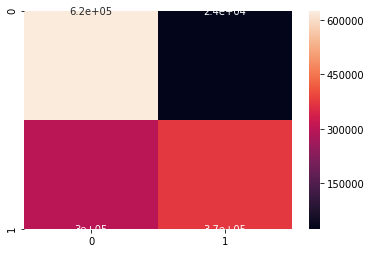

In [263]:
sns.heatmap(confusion_matrix(y_test, predictionL), annot=True)
print(confusion_matrix(y_test, predictionL))

KNN

In [264]:
#I am going to choose choose k=3 becuase must k have similar score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predictionK=knn.predict(X_test)

In [265]:
print(classification_report(y_test,predictionK))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60    647762
           1       0.62      0.61      0.61    672238

    accuracy                           0.61   1320000
   macro avg       0.61      0.61      0.61   1320000
weighted avg       0.61      0.61      0.61   1320000



In [266]:
print("Accuracy:",metrics.accuracy_score(y_test,predictionK))

Accuracy: 0.6091909090909091


[[393902 253860]
 [262008 410230]]


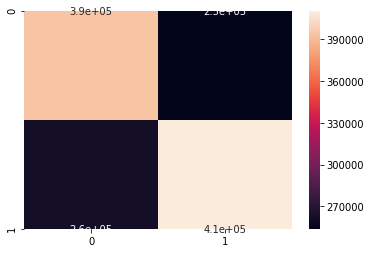

In [267]:
sns.heatmap(confusion_matrix(y_test, predictionK), annot=True)
print(confusion_matrix(y_test, predictionK))

Decision Tree

In [279]:
# Create Decision Tree classifer object
Tree = DecisionTreeClassifier()
Tree = Tree.fit(X_train,y_train)
predictionT = Tree.predict(X_test)

In [280]:
print(classification_report(y_test,predictionT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    647762
           1       1.00      1.00      1.00    672238

    accuracy                           1.00   1320000
   macro avg       1.00      1.00      1.00   1320000
weighted avg       1.00      1.00      1.00   1320000



In [281]:
print("Accuracy:",metrics.accuracy_score(y_test, predictionT))

Accuracy: 0.9997560606060606


[[647628    134]
 [   188 672050]]


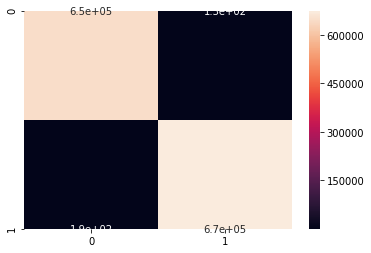

In [282]:
sns.heatmap(confusion_matrix(y_test, predictionT), annot=True)
print(confusion_matrix(y_test, predictionT))

Score

In [272]:
LogisticRegression.score(X_test,y_test)

0.7555856060606061

In [273]:
LogisticRegression.score(X_train,y_train)

0.7554313432835821

In [274]:
knn.score(X_test,y_test)

0.6091909090909091

In [275]:
knn.score(X_train,y_train)

0.8023164179104477

In [276]:
Tree.score(X_test,y_test)

1.0

In [277]:
Tree.score(X_train,y_train)

1.0